In [62]:
# Importuri
import numpy as np
import matplotlib.pyplot as plt


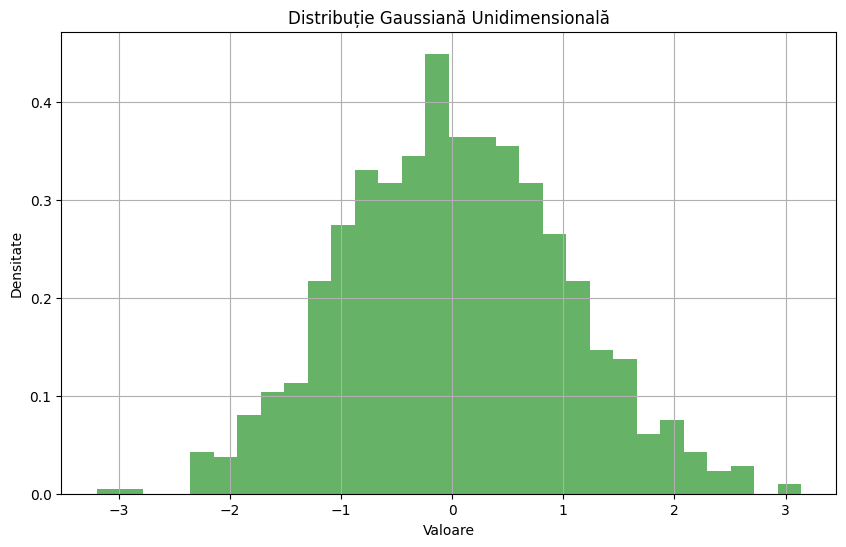

In [63]:
# Setarea valorilor pentru media și varianța distribuției unidimensionale Gaussiene
media_uni = 0   # Media
var_uni = 1     # Varianța

# Generarea eșantionului pentru distribuția Gaussiană unidimensională
esantion_uni = np.random.normal(media_uni, np.sqrt(var_uni), 1000)

# Crearea graficului pentru distribuția unidimensională
plt.figure(figsize=(10, 6))
plt.hist(esantion_uni, bins=30, density=True, alpha=0.6, color='g')
plt.title("Distribuție Gaussiană Unidimensională")
plt.xlabel("Valoare")
plt.ylabel("Densitate")
plt.grid(True)
plt.show()

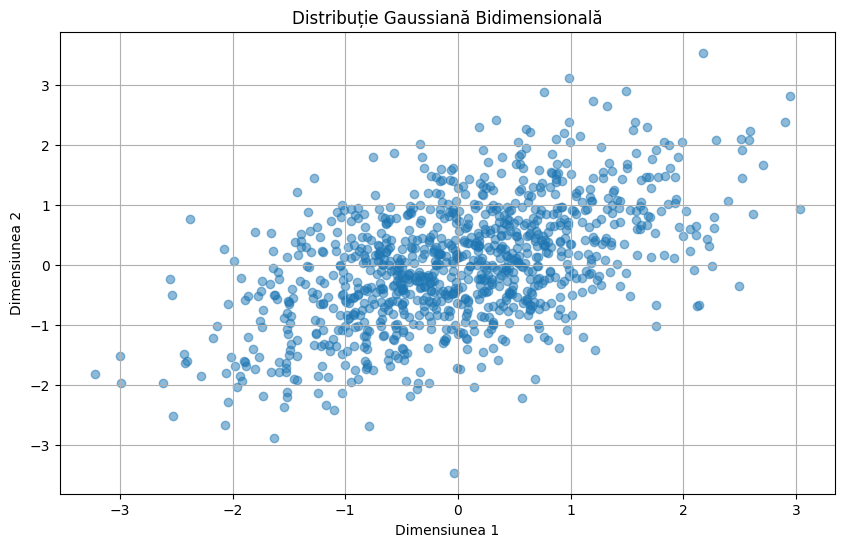

In [64]:
# Setarea valorilor pentru media și matricea de covarianță a distribuției bidimensionale Gaussiene
media_bi = [0, 0]  # Media pentru cele două dimensiuni
cov_bi = [[1, 0.5], [0.5, 1]]  # Matricea de covarianță exemplară

# Generarea eșantionului pentru distribuția Gaussiană bidimensională
esantion_bi = np.random.multivariate_normal(media_bi, cov_bi, 1000)

# Crearea graficului pentru distribuția bidimensională
plt.figure(figsize=(10, 6))
plt.scatter(esantion_bi[:, 0], esantion_bi[:, 1], alpha=0.5)
plt.title("Distribuție Gaussiană Bidimensională")
plt.xlabel("Dimensiunea 1")
plt.ylabel("Dimensiunea 2")
plt.grid(True)
plt.show()

/Users/nicolaemariusghergu/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


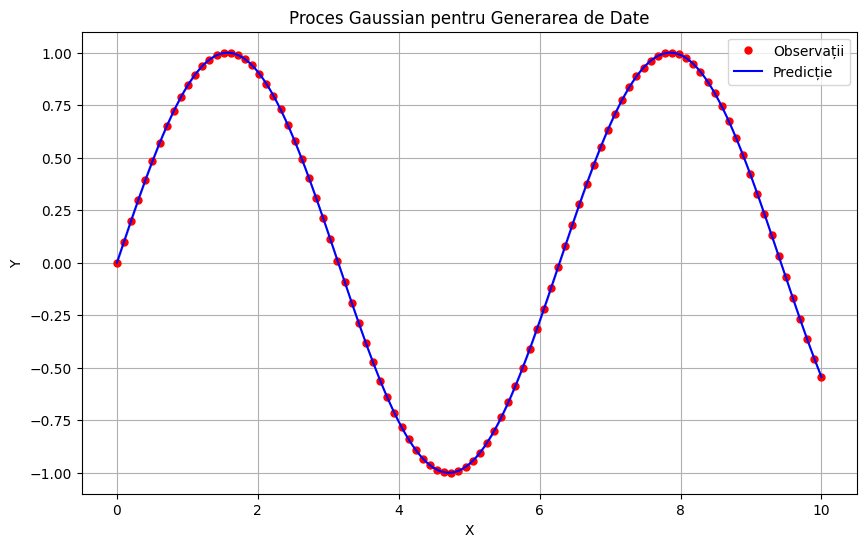

In [65]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Setarea hiperparametrilor pentru procesul Gaussian
lungime_scala = 1.0
sigma_f = 1.0

# Crearea nucleului pentru procesul Gaussian
kernel = C(sigma_f) * RBF(lungime_scala)

# Crearea și antrenarea procesului Gaussian
gp = GaussianProcessRegressor(kernel=kernel)

# Generarea datelor de antrenare
X = np.atleast_2d(np.linspace(0, 10, 100)).T
Y = np.sin(X).ravel()

# Antrenarea modelului
gp.fit(X, Y)

# Generarea predicțiilor pe un interval dat
X_pred = np.atleast_2d(np.linspace(0, 10, 1000)).T
Y_pred, sigma = gp.predict(X_pred, return_std=True)

# Crearea graficului pentru procesul Gaussian
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'r.', markersize=10, label='Observații')
plt.plot(X_pred, Y_pred, 'b-', label='Predicție')
plt.fill_between(X_pred.ravel(), Y_pred - sigma, Y_pred + sigma, alpha=0.2, color='k')
plt.title("Proces Gaussian pentru Generarea de Date")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


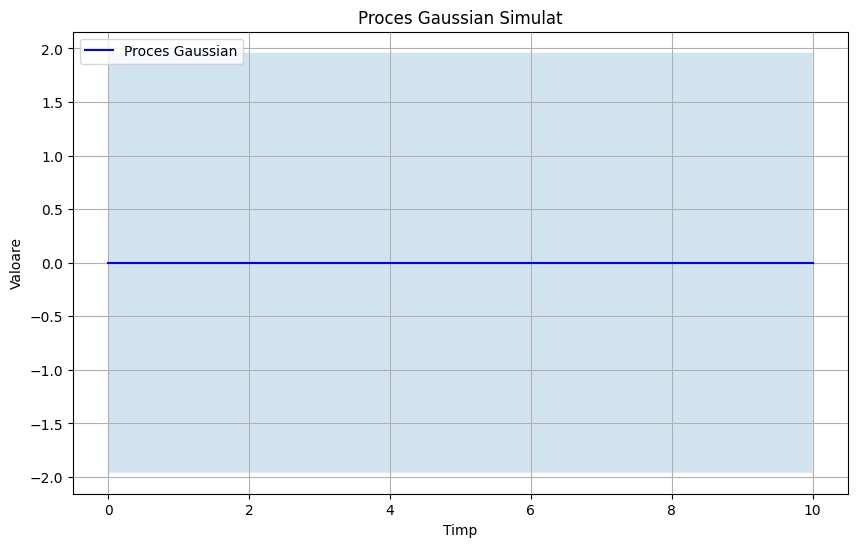

In [66]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definirea intervalului de timp pentru procesele Gaussiene
t = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Definirea kernel-ului pentru procesul Gaussian
# Voi folosi un kernel RBF cu lungimea scalei aleasă arbitrar și un kernel constant
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Crearea și antrenarea modelului de proces Gaussian
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Simularea procesului Gaussian
y_pred, sigma = gp.predict(t, return_std=True)

# Crearea graficului pentru procesul Gaussian
plt.figure(figsize=(10, 6))
plt.plot(t, y_pred, 'b-', label='Proces Gaussian')
plt.fill_between(t.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2)
plt.title("Proces Gaussian Simulat")
plt.xlabel("Timp")
plt.ylabel("Valoare")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [67]:
from sklearn.datasets import fetch_openml

co2 = fetch_openml(data_id=41187, as_frame=True, parser="pandas")
co2.frame.head()

import pandas as pd

co2_data = co2.frame

co2_data['date'] = pd.to_datetime(co2_data[['year', 'month', 'day']])  # Asigurăm că 'date' este tip datetime
co2_data.set_index('date', inplace=True)  # Setăm coloana 'date' ca index
co2_data.drop(['year', 'month', 'day'], axis=1, inplace=True)  # Eliminăm coloanele de care nu mai avem nevoie

print(co2_data)

# Selectează doar coloanele numerice pentru resampling
numeric_cols = co2_data.select_dtypes(include=[np.number])

# Aplică resampling-ul și calculează media pentru coloanele numerice
co2_monthly_mean = numeric_cols.resample('M').mean()

# Afișează primelele rânduri pentru a verifica rezultatul
print(co2_monthly_mean.head())


            weight  flag station    co2
date                                   
1958-03-29       4     0     MLO  316.1
1958-04-05       6     0     MLO  317.3
1958-04-12       4     0     MLO  317.6
1958-04-19       6     0     MLO  317.5
1958-04-26       2     0     MLO  316.4
...            ...   ...     ...    ...
2001-12-01       7     0     MLO  370.3
2001-12-08       7     0     MLO  370.8
2001-12-15       7     0     MLO  371.2
2001-12-22       6     0     MLO  371.3
2001-12-29       6     0     MLO  371.5

[2225 rows x 4 columns]
            weight  flag         co2
date                                
1958-03-31    4.00   0.0  316.100000
1958-04-30    4.50   0.0  317.200000
1958-05-31    4.00   0.0  317.433333
1958-06-30     NaN   NaN         NaN
1958-07-31    4.25   0.0  315.625000


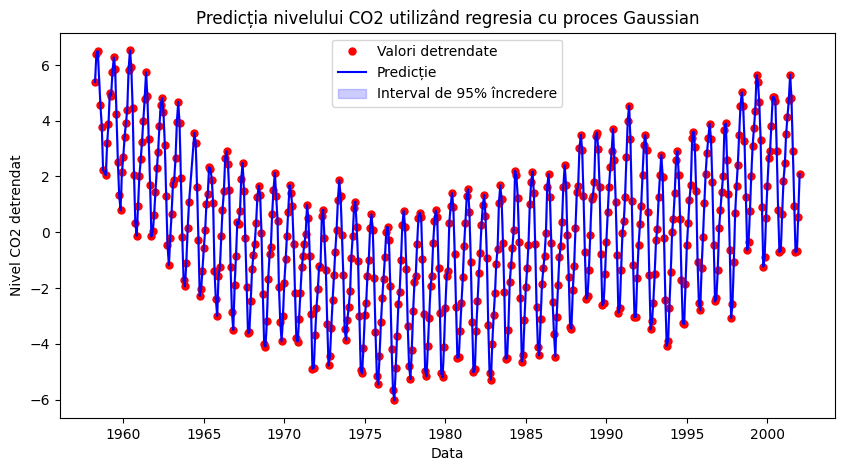

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt
import numpy as np

# Presupunem că co2_data este DataFrame-ul tău cu date corecte
# și 'co2' este coloana cu valorile de interes

# Elimină valorile NaN pentru a evita erorile în regresie
co2_data = co2_data.dropna(subset=['co2'])

# Resampling pe lună și calculul mediei pentru coloana 'co2'
co2_monthly_mean = co2_data['co2'].resample('M').mean()

# Asigură că nu sunt valori NaN după resampling
co2_monthly_mean = co2_monthly_mean.dropna()

# 1. Calculul trendului liniar
# Pregătirea datelor pentru regresie
X_trend = np.arange(len(co2_monthly_mean)).reshape(-1, 1)
y_trend = co2_monthly_mean.values

# Crearea și antrenarea modelului de regresie liniară
model_trend = LinearRegression()
model_trend.fit(X_trend, y_trend)

# Predicția trendului liniar
trend_predicted = model_trend.predict(X_trend)

# 2. Eliminarea trendului pentru a detrenda seria de timp
co2_detrended = y_trend - trend_predicted

# 3. Regresia cu proces Gaussian
# Setarea nucleului pentru procesul Gaussian
kernel_gp = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Crearea și antrenarea modelului Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel_gp, n_restarts_optimizer=10)

# Antrenarea modelului pe datele detrendate
gp.fit(X_trend, co2_detrended)

# Predicția valorilor CO2 pentru intervalul de timp al datelor de antrenament
y_pred, sigma = gp.predict(X_trend, return_std=True)

# Afișarea predicțiilor și intervalului de încredere
plt.figure(figsize=(10, 5))
plt.plot(co2_monthly_mean.index, co2_detrended, 'r.', markersize=10, label='Valori detrendate')
plt.plot(co2_monthly_mean.index, y_pred, 'b-', label='Predicție')
plt.fill_between(co2_monthly_mean.index, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue', label='Interval de 95% încredere')
plt.legend()
plt.title('Predicția nivelului CO2 utilizând regresia cu proces Gaussian')
plt.xlabel('Data')
plt.ylabel('Nivel CO2 detrendat')
plt.show()
